In [256]:
from pyforest import *
lazy_imports()

import warnings
warnings.filterwarnings("ignore")

In [257]:
Train_data=pd.read_csv("E:\Full Stack Data Scientist Bootcamp\Bigmart-20230223T142748Z-001\Bigmart/bigmart_train.csv")
Train_data.head()

<IPython.core.display.Javascript object>

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [258]:
Test_data=pd.read_csv("E:\Full Stack Data Scientist Bootcamp\Bigmart-20230223T142748Z-001\Bigmart/bigmart_test.csv")
Test_data.head()

<IPython.core.display.Javascript object>

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [259]:
Train_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [260]:
Train_data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [261]:
Test_data.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [262]:
Train_data.shape

(8523, 12)

In [263]:
Train_data['source']='train'
Test_data['source']='test'
df=pd.concat([Train_data,Test_data],ignore_index=True)
df

<IPython.core.display.Javascript object>

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14199,FDB58,10.50,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN,test
14200,FDD47,7.60,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN,test
14201,NCO17,10.00,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1,NaN,test
14202,FDJ26,15.30,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1,NaN,test


In [264]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

In [265]:
df.shape

(14204, 13)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

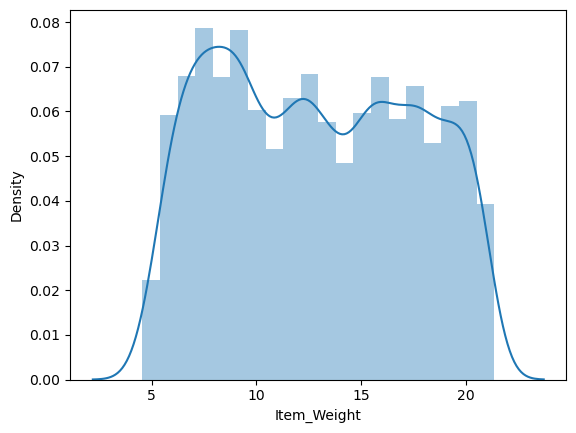

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

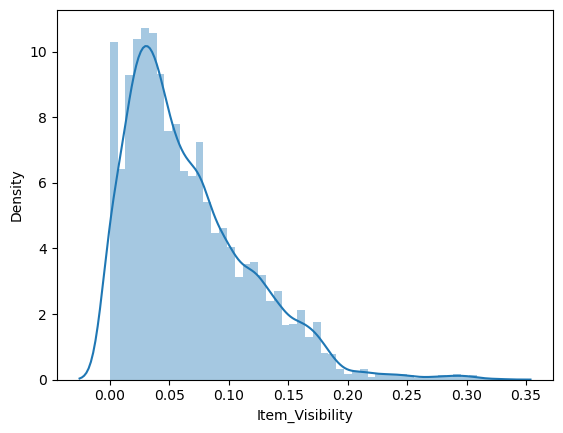

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

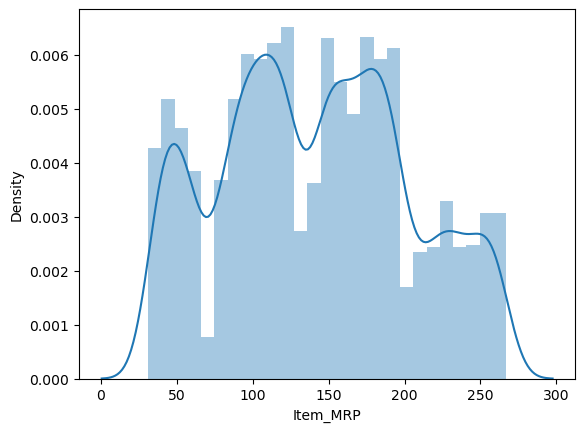

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

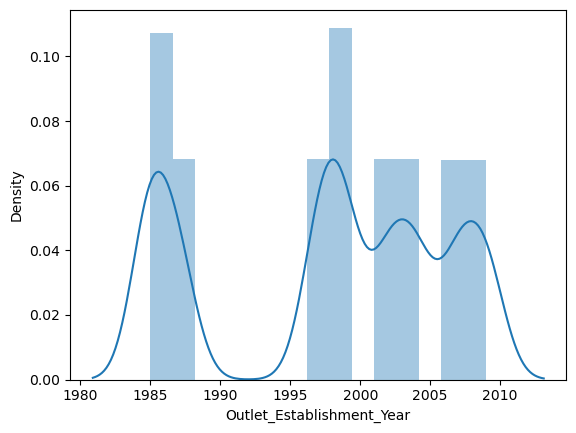

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

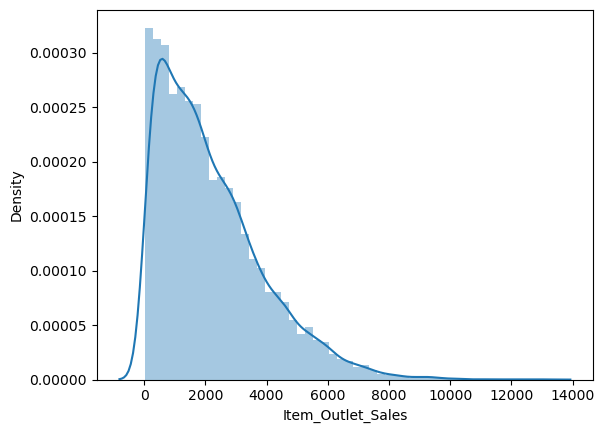

In [266]:
for i in Train_data.describe().columns:
    sns.distplot(Train_data[i].dropna())
    plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

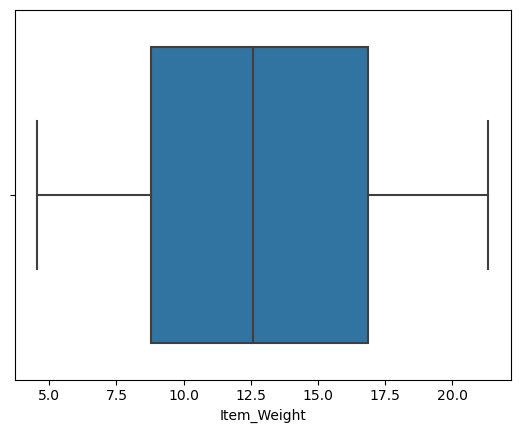

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

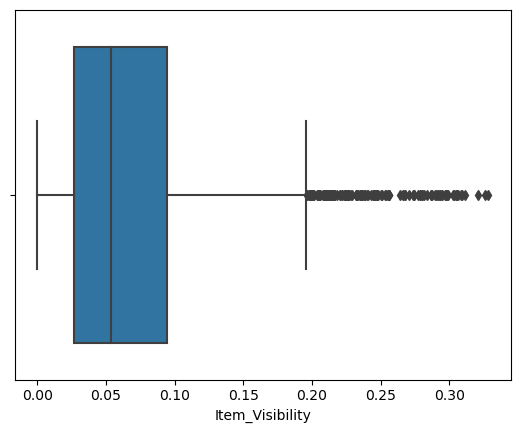

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

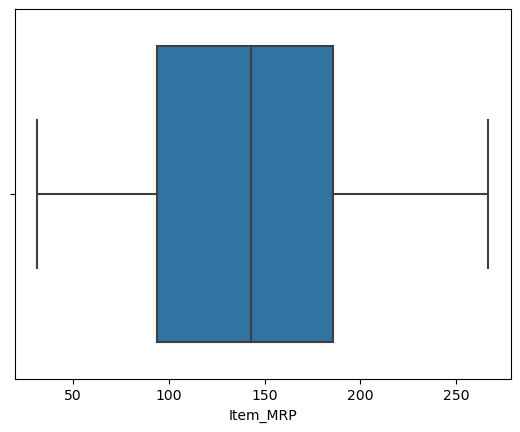

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

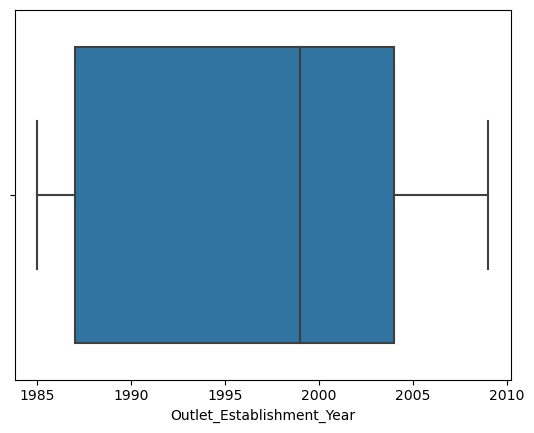

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

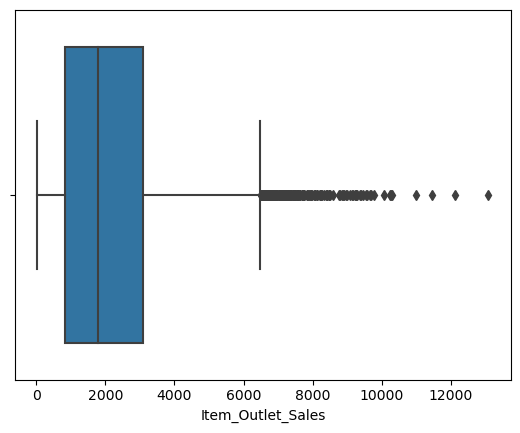

In [267]:
for i in Train_data.describe().columns:
    sns.boxplot(Train_data[i].dropna())
    plt.show()

In [268]:
Train_data.Item_Type.value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Snack Foods'),
  Text(1, 0, 'Dairy'),
  Text(2, 0, 'Others'),
  Text(3, 0, 'Fruits and Vegetables'),
  Text(4, 0, 'Baking Goods'),
  Text(5, 0, 'Health and Hygiene'),
  Text(6, 0, 'Breads'),
  Text(7, 0, 'Hard Drinks'),
  Text(8, 0, 'Seafood'),
  Text(9, 0, 'Soft Drinks'),
  Text(10, 0, 'Household'),
  Text(11, 0, 'Frozen Foods'),
  Text(12, 0, 'Meat'),
  Text(13, 0, 'Canned'),
  Text(14, 0, 'Starchy Foods'),
  Text(15, 0, 'Breakfast')])

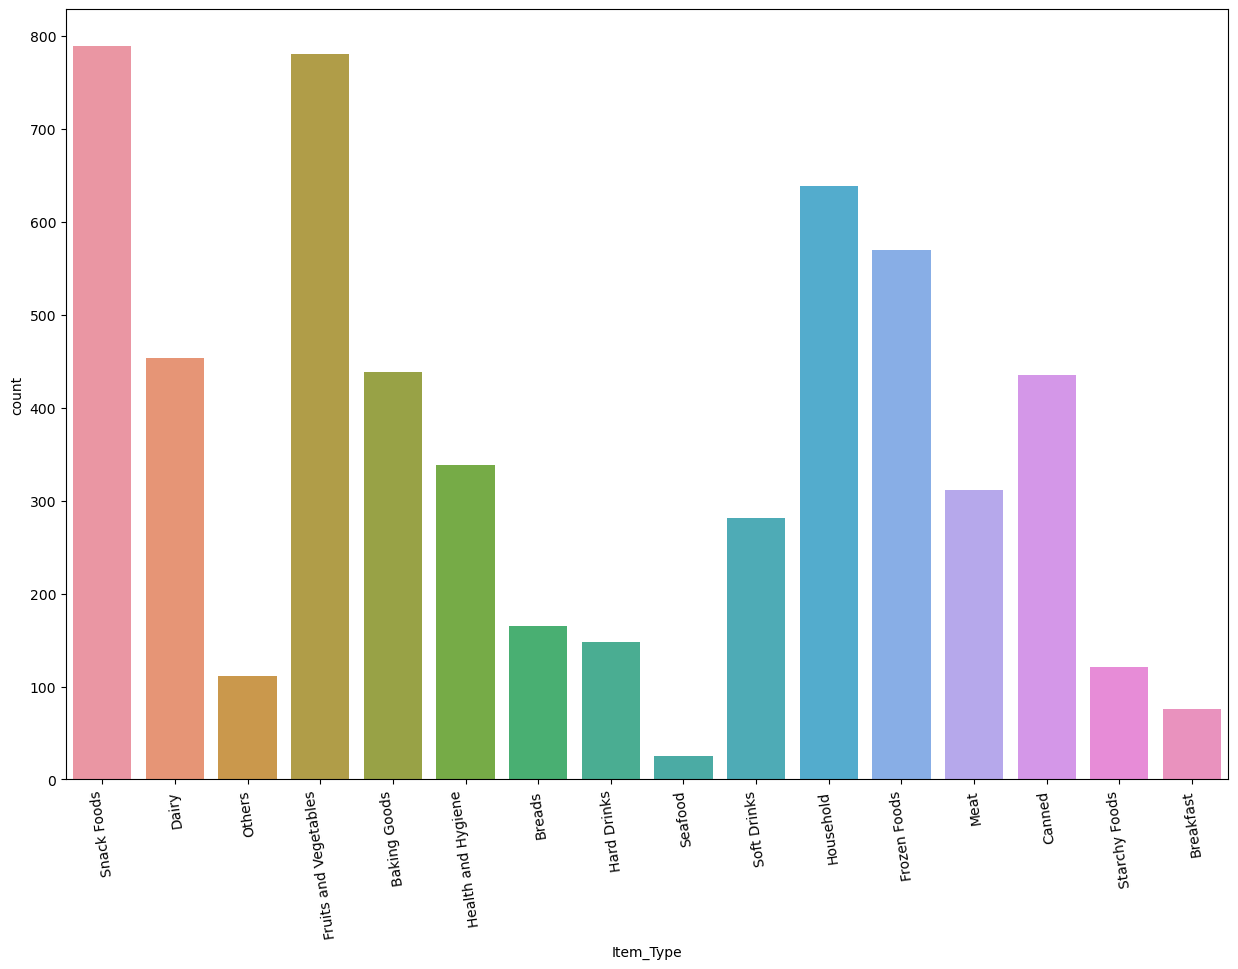

In [269]:
plt.figure(figsize=(15,10))
sns.countplot(Test_data.Item_Type)
plt.xticks(rotation=98)

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

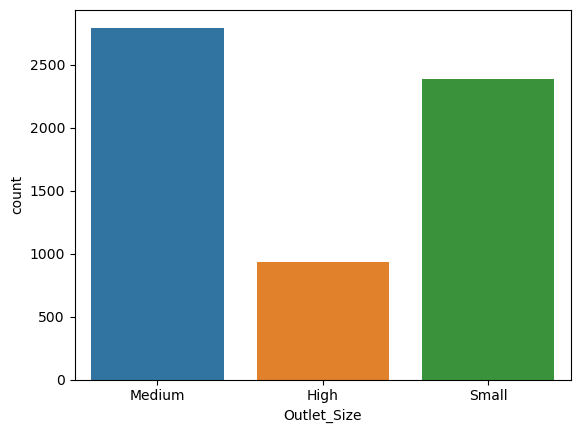

In [270]:
sns.countplot(Train_data.Outlet_Size)

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

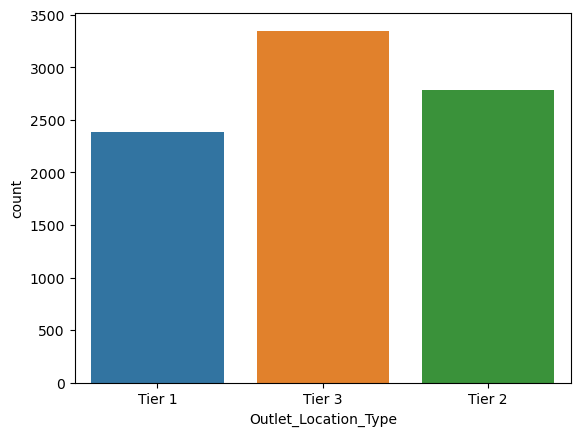

In [271]:
sns.countplot(Train_data.Outlet_Location_Type)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Supermarket Type1'),
  Text(1, 0, 'Supermarket Type2'),
  Text(2, 0, 'Grocery Store'),
  Text(3, 0, 'Supermarket Type3')])

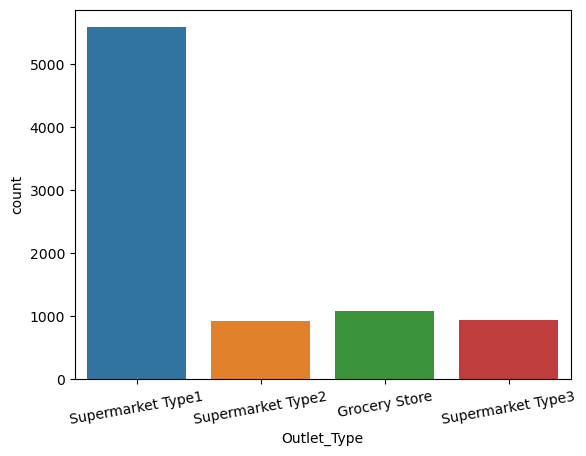

In [272]:
sns.countplot(Train_data.Outlet_Type)
plt.xticks(rotation=10)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<AxesSubplot:title={'center':'Item_Weight and Item_Outlet_Sales Analysis'}, xlabel='Item_Weight', ylabel='Item_Outlet_Sales'>

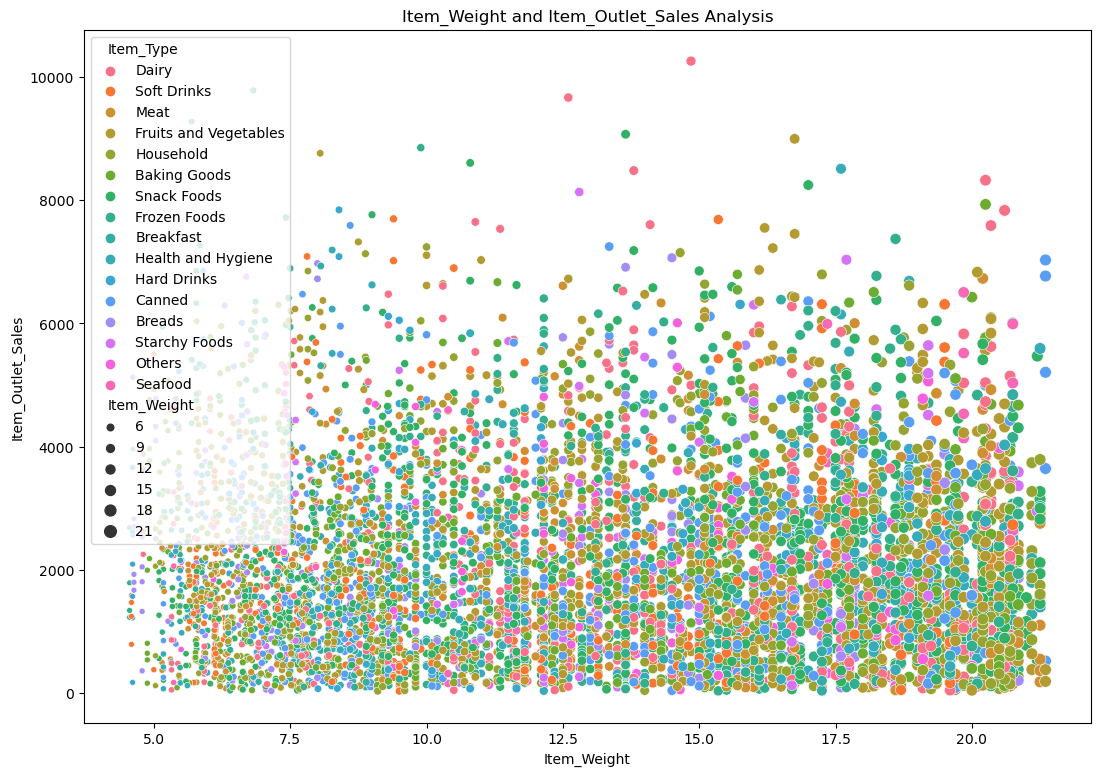

In [273]:
plt.figure(figsize=(13,9))
plt.xlabel('Item_Weight')
plt.ylabel('Item_Outlet_Sales')
plt.title('Item_Weight and Item_Outlet_Sales Analysis')
sns.scatterplot(x='Item_Weight', y='Item_Outlet_Sales',hue='Item_Type', size='Item_Weight',data=Train_data)

In [274]:
Train_data.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014048,0.027141,-0.011588,0.014123
Item_Visibility,-0.014048,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.027141,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.011588,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<AxesSubplot:title={'center':'Item_Weight and Item_Outlet_Sales Analysis'}, xlabel='Item_Weight', ylabel='Item_Outlet_Sales'>

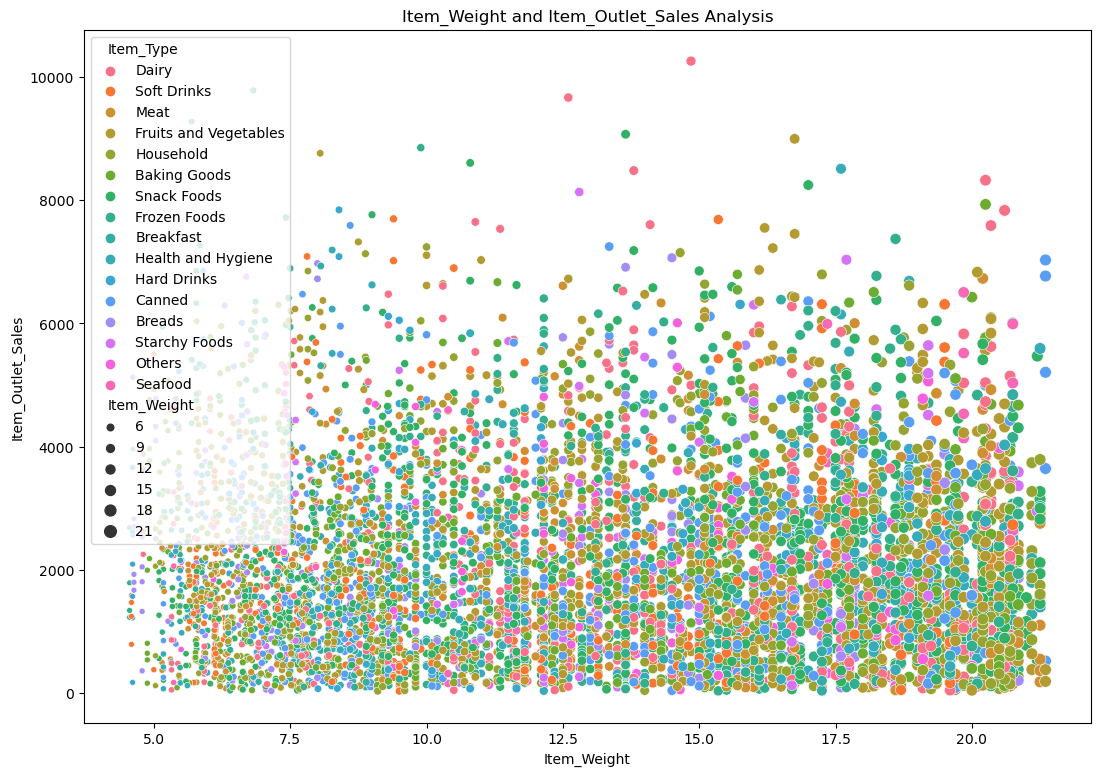

In [275]:
plt.figure(figsize=(13,9))
plt.xlabel('Item_Weight')
plt.ylabel('Item_Outlet_Sales')
plt.title('Item_Weight and Item_Outlet_Sales Analysis')
sns.scatterplot(x='Item_Weight', y='Item_Outlet_Sales',hue='Item_Type', size='Item_Weight',data=Train_data)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

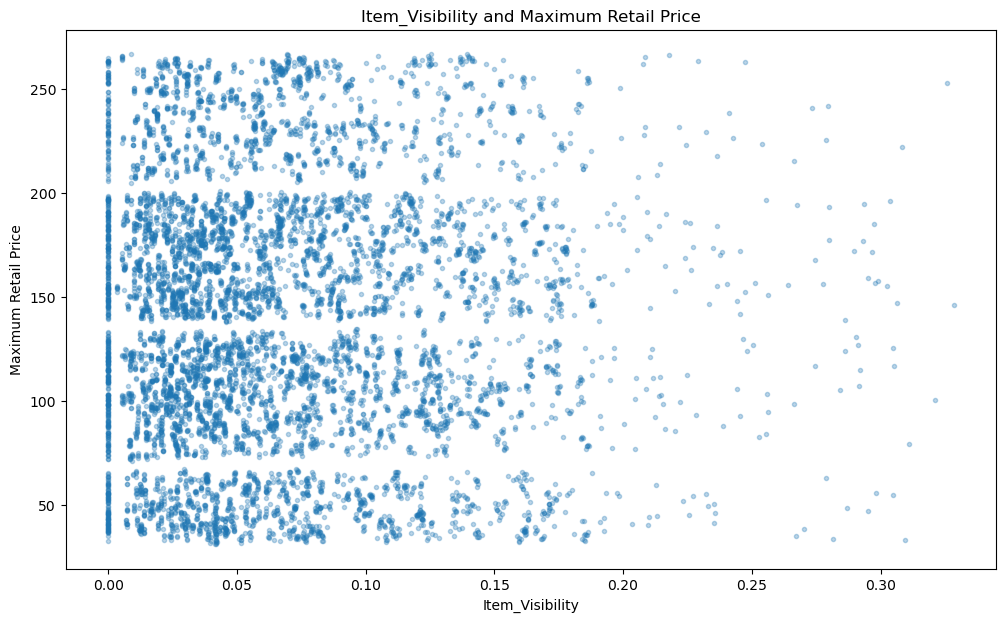

In [276]:
plt.figure(figsize=(12,7))
plt.xlabel('Item_Visibility')
plt.ylabel('Maximum Retail Price')
plt.title('Item_Visibility and Maximum Retail Price')
plt.plot(Train_data.Item_Visibility, Train_data.Item_MRP, ".",alpha = 0.3)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

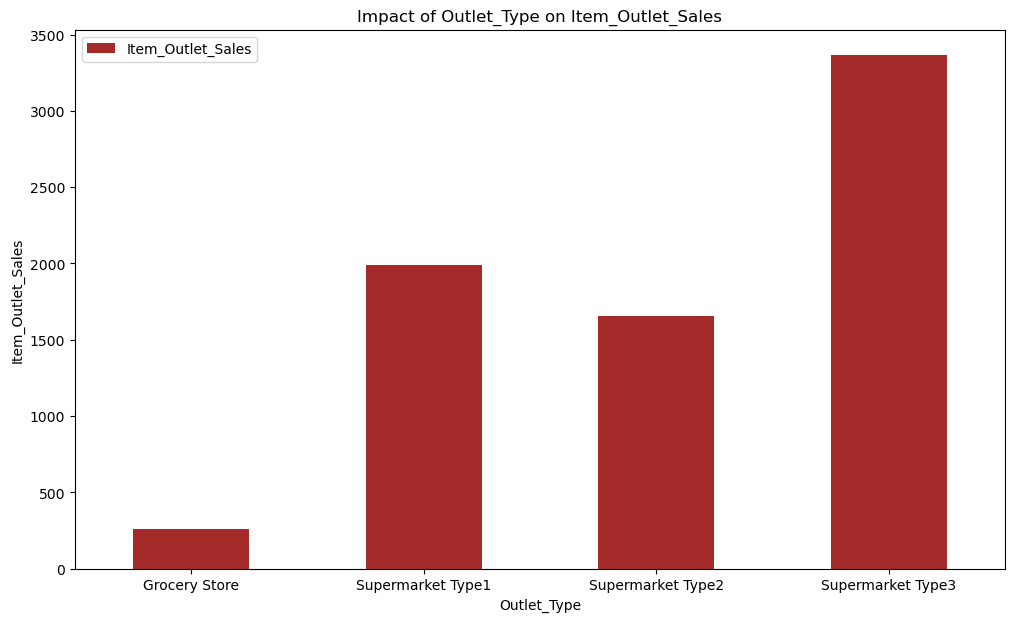

In [277]:
Item_Type_pivot = \
Train_data.pivot_table(index='Outlet_Type', values="Item_Outlet_Sales", aggfunc=np.median)

Item_Type_pivot.plot(kind='bar',color='brown',figsize=(12,7))
plt.xlabel('Outlet_Type')
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Outlet_Type on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

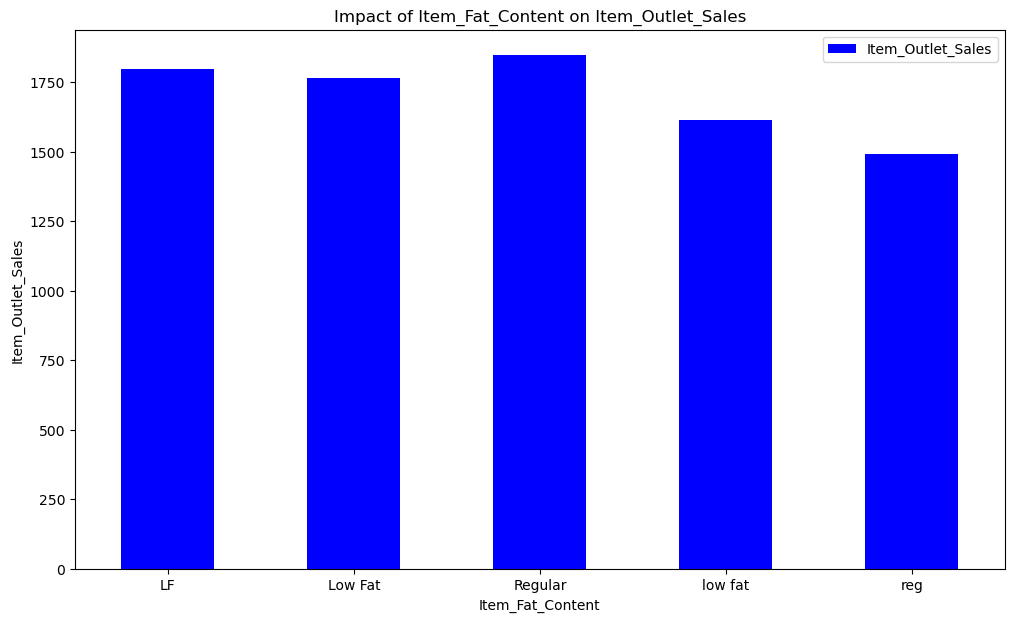

In [278]:
Item_Type_pivot = \
Train_data.pivot_table(index='Item_Fat_Content', values="Item_Outlet_Sales", aggfunc=np.median)

Item_Type_pivot.plot(kind='bar',color='blue',figsize=(12,7))
plt.xlabel('Item_Fat_Content')
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Item_Fat_Content on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

In [279]:
df['Item_Fat_Content'].value_counts()

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

In [280]:
Train_data['Item_Fat_Content']=Train_data['Item_Fat_Content'].replace({'LF':'Low Fat','reg':'Regular','low fat':'Low Fat'})

In [281]:
Train_data['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

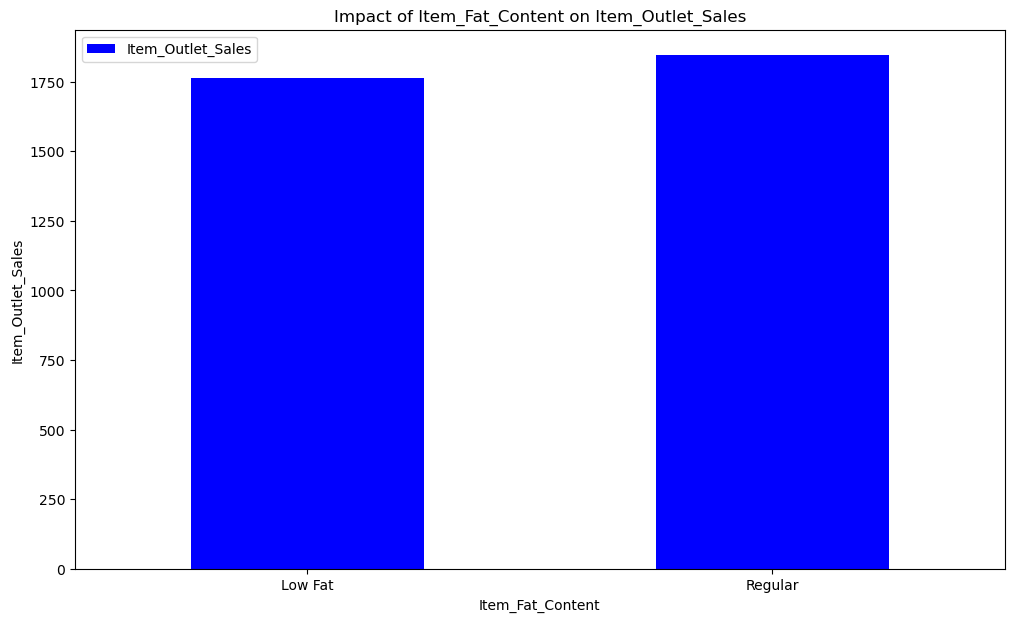

In [282]:
Item_Fat_Content_pivot =\
Train_data.pivot_table(index='Item_Fat_Content',values='Item_Outlet_Sales',aggfunc=np.median)

Item_Fat_Content_pivot.plot(kind='bar',color='blue',figsize=(12,7))
plt.xlabel('Item_Fat_Content')
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Item_Fat_Content on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

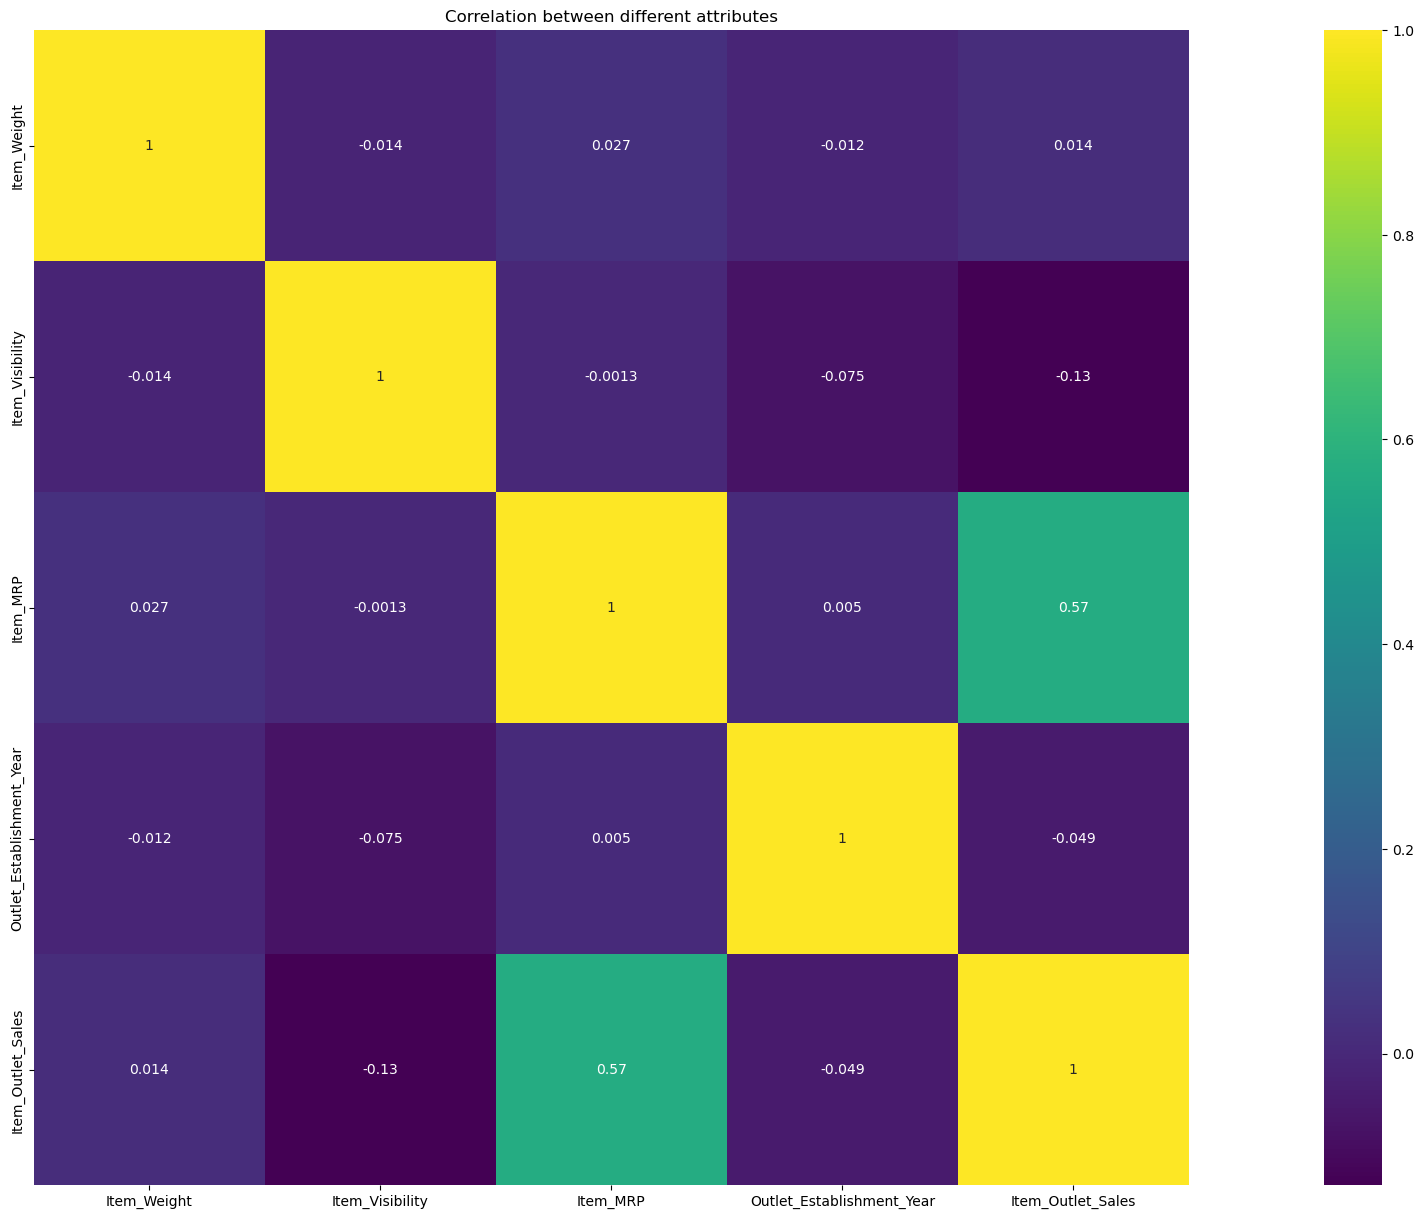

In [283]:
plt.figure(figsize=(35,15))
sns.heatmap(Train_data.corr(),vmax=1, square=True,annot=True, cmap='viridis')
plt.title('Correlation between different attributes')
plt.show()

#### Feature Engineering selection and Transformation

In [284]:
# Item_Weight columns is a norall distributed data this colomn also have the 
#  many null values in their fileds If the colomn data is noraml 
#  distrubuted the we can replace the null values by the mean of that colnum


In [285]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
source                        object
dtype: object

In [286]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

In [287]:
df['Item_Weight'].mean()

12.792854228644991

In [288]:
df['Item_Weight'].fillna(df['Item_Weight'].mean(),inplace =True)

In [289]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

In [290]:
df.Outlet_Size.isna().sum()

4016

In [291]:
df.Outlet_Size.value_counts()

Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

In [292]:
df.Outlet_Size.fillna('Medium',inplace=True)

In [293]:
df.Outlet_Size.value_counts()

Medium    8671
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

In [294]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

In [295]:
df.Item_Fat_Content.value_counts()

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

In [296]:
df.Item_Fat_Content.isna().sum()

0

In [297]:
df.Item_Fat_Content.fillna('Low Fat',inplace=True)

In [298]:
df.Item_Fat_Content.isna().sum()

0

In [299]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'LF':'Low Fat','reg':'Regular','low fat':'Low Fat',})

In [300]:
df['Item_Fat_Content'].value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

In [301]:
df.Item_Visibility.value_counts()

0.000000    879
0.076841      3
0.077011      3
0.077169      3
0.076792      3
           ... 
0.162572      1
0.014826      1
0.058034      1
0.043786      1
0.104720      1
Name: Item_Visibility, Length: 13006, dtype: int64

In [302]:
# In the column of the Item_Visibility we that sum fileds if fill with the Zero(0) 
# this means that we have not the product the mart so we consider the Zero's (0) as
#  the NaN and fill them with the Median becase the column data is right sekwed not the 
# distributed the normal 

df.Item_Visibility.fillna(df.Item_Visibility.median(),inplace =True)

In [303]:
df.Item_Visibility.isna().sum()

0

In [304]:
df.Outlet_Establishment_Year.value_counts()

1985    2439
1987    1553
1999    1550
1997    1550
2004    1550
2002    1548
2009    1546
2007    1543
1998     925
Name: Outlet_Establishment_Year, dtype: int64

In [305]:
df.Outlet_Establishment_Year.isnull().sum()

0

In [306]:
# we want to know that the our Outlet is Established about what year
df['Outlet_Years']=2009-df['Outlet_Establishment_Year']

In [307]:
df['Outlet_Years'].describe()

count    14204.000000
mean        11.169319
std          8.371664
min          0.000000
25%          5.000000
50%         10.000000
75%         22.000000
max         24.000000
Name: Outlet_Years, dtype: float64

In [308]:
df.Item_Type.value_counts()

Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

In [309]:
df.Item_Type.isna().sum()

0

In [310]:
df.Item_Identifier.value_counts()

FDU15    10
FDS25    10
FDA38    10
FDW03    10
FDJ10    10
         ..
FDR51     7
FDM52     7
DRN11     7
FDH58     7
NCW54     7
Name: Item_Identifier, Length: 1559, dtype: int64

In [311]:
#Changing only the first 2 characters (i.e. the category ID)

df['New_Item_type'] = df['Item_Identifier'].apply(lambda x: x[0:2])

In [312]:
df.shape

(14204, 15)

In [313]:
df.New_Item_type.value_counts()

FD    10201
NC     2686
DR     1317
Name: New_Item_type, dtype: int64

In [314]:
# df.New_Item_type=df.New_Item_type.replace({'FD':'Food','NC':'Non-Consumble','DR':'Drinks'}, inplace=True)
# df.New_Item_type

In [315]:
df.New_Item_type.value_counts()

FD    10201
NC     2686
DR     1317
Name: New_Item_type, dtype: int64

In [316]:
#Rename them to more intuitive  categories:

df['New_Item_type'] = df['New_Item_type'].map({'FD':'Food','NC':'Non-Consumable','DR':'Drinks'})
df['New_Item_type'].value_counts()

Food              10201
Non-Consumable     2686
Drinks             1317
Name: New_Item_type, dtype: int64

In [317]:
df.loc[df['New_Item_type']=='Non-Consumable','Item_Fat_Content']= "Non-Edible"
df['Item_Fat_Content'].value_counts()

Low Fat       6499
Regular       5019
Non-Edible    2686
Name: Item_Fat_Content, dtype: int64

In [318]:
item_visib_avg = df.pivot_table(values='Item_Visibility', index='Item_Identifier')

In [319]:
item_visib_avg

,Item_Visibility
Item_Identifier,
DRA12,0.034938
DRA24,0.045646
DRA59,0.133384
DRB01,0.079736
DRB13,0.006799
...,...
NCZ30,0.027302
NCZ41,0.056396
NCZ42,0.011015


In [320]:
function = lambda x: x['Item_Visibility']/item_visib_avg['Item_Visibility'][item_visib_avg.index == x['Item_Identifier']][0]
df['item_visib_avg'] = df.apply(function,axis=1).astype(float)

In [321]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Outlet_Years,New_Item_type,item_visib_avg
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train,10,Food,0.931078
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train,0,Drinks,0.933420
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train,10,Food,0.960069
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,train,11,Food,0.000000
4,NCD19,8.93,Non-Edible,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train,22,Non-Consumable,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14199,FDB58,10.50,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN,test,12,Food,0.874729
14200,FDD47,7.60,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN,test,0,Food,0.878292
14201,NCO17,10.00,Non-Edible,0.073529,Health and Hygiene,118.7440,OUT045,2002,Medium,Tier 2,Supermarket Type1,NaN,test,7,Non-Consumable,1.162245
14202,FDJ26,15.30,Regular,0.000000,Canned,214.6218,OUT017,2007,Medium,Tier 2,Supermarket Type1,NaN,test,2,Food,0.000000


In [322]:
# fro apply the machine learning model we need the integer type data
#  for this till now we converted most of the column data into the categories wise 
# Now it time to label them as 0,1,2,3,4,... like that

from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

#New variable for outlet
df['Outlet'] = label.fit_transform(df['Outlet_Identifier'])
varib = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','New_Item_type','Outlet_Type','Outlet']
for i in varib:
    df[i] = label.fit_transform(df[i])


In [323]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Outlet_Years,New_Item_type,item_visib_avg,Outlet
0,FDA15,9.30,0,0.016047,Dairy,249.8092,OUT049,1999,1,0,1,3735.1380,train,10,1,0.931078,9
1,DRC01,5.92,2,0.019278,Soft Drinks,48.2692,OUT018,2009,1,2,2,443.4228,train,0,0,0.933420,3
2,FDN15,17.50,0,0.016760,Meat,141.6180,OUT049,1999,1,0,1,2097.2700,train,10,1,0.960069,9
3,FDX07,19.20,2,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,1,2,0,732.3800,train,11,1,0.000000,0
4,NCD19,8.93,1,0.000000,Household,53.8614,OUT013,1987,0,2,1,994.7052,train,22,2,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14199,FDB58,10.50,2,0.013496,Snack Foods,141.3154,OUT046,1997,2,0,1,NaN,test,12,1,0.874729,8
14200,FDD47,7.60,2,0.142991,Starchy Foods,169.1448,OUT018,2009,1,2,2,NaN,test,0,1,0.878292,3
14201,NCO17,10.00,1,0.073529,Health and Hygiene,118.7440,OUT045,2002,1,1,1,NaN,test,7,2,1.162245,7
14202,FDJ26,15.30,2,0.000000,Canned,214.6218,OUT017,2007,1,1,1,NaN,test,2,1,0.000000,2


In [324]:
# But the converting the categorical column into the label 0,1,2,3,4,...
# like that different label are in one column so it might be posible that 
# our model think that 0<2<4, 1>0 ,like that 
#  so for Avoiding thid think we convert the labedled_categorical_column into the 
# demies variables 


#Dummy Variables:

df = pd.get_dummies(df, columns =['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','New_Item_type','Outlet_Type','Outlet'])
df.dtypes 

<IPython.core.display.Javascript object>

Item_Identifier               object
Item_Weight                  float64
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Item_Outlet_Sales            float64
source                        object
Outlet_Years                   int64
item_visib_avg               float64
Item_Fat_Content_0             uint8
Item_Fat_Content_1             uint8
Item_Fat_Content_2             uint8
Outlet_Location_Type_0         uint8
Outlet_Location_Type_1         uint8
Outlet_Location_Type_2         uint8
Outlet_Size_0                  uint8
Outlet_Size_1                  uint8
Outlet_Size_2                  uint8
New_Item_type_0                uint8
New_Item_type_1                uint8
New_Item_type_2                uint8
Outlet_Type_0                  uint8
Outlet_Type_1                  uint8
Outlet_Type_2                  uint8
Outlet_Type_3                  uint8
O

In [325]:
df

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,source,Outlet_Years,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,FDA15,9.30,0.016047,Dairy,249.8092,OUT049,1999,3735.1380,train,10,...,0,0,0,0,0,0,0,0,0,1
1,DRC01,5.92,0.019278,Soft Drinks,48.2692,OUT018,2009,443.4228,train,0,...,0,0,0,1,0,0,0,0,0,0
2,FDN15,17.50,0.016760,Meat,141.6180,OUT049,1999,2097.2700,train,10,...,0,0,0,0,0,0,0,0,0,1
3,FDX07,19.20,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,732.3800,train,11,...,1,0,0,0,0,0,0,0,0,0
4,NCD19,8.93,0.000000,Household,53.8614,OUT013,1987,994.7052,train,22,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14199,FDB58,10.50,0.013496,Snack Foods,141.3154,OUT046,1997,NaN,test,12,...,0,0,0,0,0,0,0,0,1,0
14200,FDD47,7.60,0.142991,Starchy Foods,169.1448,OUT018,2009,NaN,test,0,...,0,0,0,1,0,0,0,0,0,0
14201,NCO17,10.00,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,test,7,...,0,0,0,0,0,0,0,1,0,0
14202,FDJ26,15.30,0.000000,Canned,214.6218,OUT017,2007,NaN,test,2,...,0,0,1,0,0,0,0,0,0,0


### Modeling 

In [326]:
#  As we konw that Aove in Feature engineering we combined the categories in the some column and
#  creaed the new column and deleting the previou colomn so
# Now drop them

df.drop(['Item_Type','Outlet_Establishment_Year'],axis=1, inplace=True)

In [327]:
train = df.loc[df['source'] == 'train']
test = df.loc[df['source'] == 'test']

In [328]:
train.drop(['source'],axis=1,inplace=True)

In [329]:
test.drop(['Item_Outlet_Sales','source'],axis=1,inplace=True)

In [330]:
X_train = train.drop(['Item_Outlet_Sales','Item_Identifier','Outlet_Identifier'],axis=1)
y_train = train['Item_Outlet_Sales']
X_test = test.drop(['Item_Identifier','Outlet_Identifier'],axis=1).copy()

In [331]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression(normalize=True)

lr.fit(X_train,y_train)

LinearRegression(normalize=True)

In [332]:
lr_pred = lr.predict(X_test)
lr_pred

array([1847. , 1592.5, 1864. , ..., 1806.5, 3592.5, 1278.5])

In [333]:
lr_accuracy = round(lr.score(X_train,y_train)*100)
lr_accuracy

56

In [334]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(max_depth=15, min_samples_leaf=100)

tree.fit(X_train,y_train)
tree_pred = tree.predict(X_test)
tree_pred

array([1649.67954808, 1412.15620504,  584.75776477, ..., 1827.83284545,
       3692.81910244, 1211.249992  ])

In [335]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=400,max_depth=6,min_samples_leaf=100,n_jobs=4)

rf.fit(X_train,y_train)

rf_accuracy = round(rf.score(X_train,y_train)*100)

rf_accuracy

61

In [336]:
from xgboost import XGBRegressor

model = XGBRegressor(n_estimators = 100, learning_rate=0.05)
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [337]:
y_pred = model.predict(X_test)
y_pred

array([1659.6506, 1297.625 ,  639.7941, ..., 1862.8121, 3716.712 ,
       1274.1649], dtype=float32)

In [338]:
model.score(X_train, y_train)*100

67.72716943174717